Discrete data key characteristics:<br>

You can count the data. It is usually units counted in whole numbers.<br>
The values cannot be divided into smaller pieces and add additional meaning.<br>
You cannot measure the data. By nature, discrete data cannot be measured at all. For example, you can measure your weight with the help of a scale. So, your weight is not a discrete data.<br>
It has a limited number of possible values e.g. days of the month.<br>
Discrete data is graphically displayed by a bar graph.<br>
CLASSIFICATION PROBLEMS:<br>
Classification focuses on estimating the relationship between the independent variables and the dependent, categorical variable.
Logistic regression. While a linear regression (y=mx+b) model outputs a real number as the label, a logistic regression model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to 1 or 0.

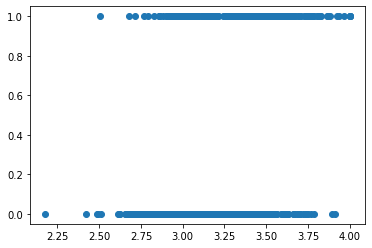

In [1]:
#binary classification
import pandas as pd
import matplotlib.pyplot as plt

admissions=pd.read_csv('admissions.csv')
plt.scatter(admissions['gpa'], admissions['admit'])
plt.show()

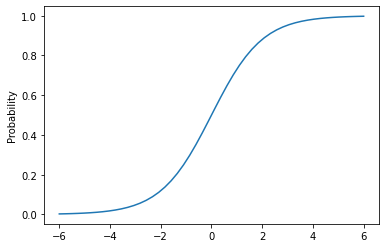

In [2]:
import numpy as np

# Logistic Function
def logistic(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logistic function.
y = logistic(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

In [3]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])

LogisticRegression()

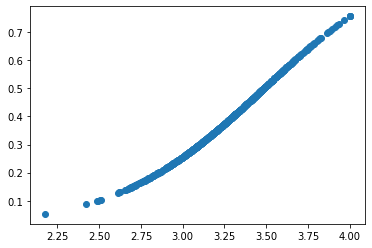

In [4]:
#the output of a logistic regression model is the probability that the row should be labelled as True, or in this case 1. We can use the trained model to return the predicted probability for each row in the training data.
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
plt.scatter(admissions["gpa"], pred_probs[:,1])

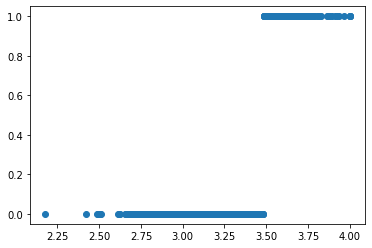

In [5]:
logistic_model = LogisticRegression()
logistic_model.fit(admissions[["gpa"]], admissions["admit"])
fitted_labels = logistic_model.predict(admissions[["gpa"]])
plt.scatter(admissions["gpa"], fitted_labels)
plt.show()

In [6]:
admissions = pd.read_csv("admissions.csv")
model = LogisticRegression()
model.fit(admissions[["gpa"]], admissions["admit"])

labels = model.predict(admissions[["gpa"]])
admissions["predicted_label"] = labels
print(admissions["predicted_label"].value_counts())
print(admissions.head())

0    507
1    137
Name: predicted_label, dtype: int64
   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


What fraction of the predictions were correct (actual label matched predicted label)?
Prediction accuracy is the number of correctly predicted labels that were correctly predicted divided by the total number of observations:

Accuracy=# of Correctly Predicted/# of Observations
In logistic regression, the model's output is a probability between 0 and 1. To decide who gets admitted, we set a threshold and accept all of the students where their computed probability exceeds that threshold. This threshold is called the discrimination threshold and scikit-learn sets it to 0.5 by default when predicting labels. If the predicted probability is greater than 0.5, the label for that observation is 1. If it is instead less than 0.5, the label for that observation is 0.

An accuracy of 1.0 means that the model predicted 100% of admissions correctly for the given discrimination threshold. An accuracy of 0.2 means that the model predicted 20% of the admissions correctly. Let's calculate the accuracy of the predictions the logistic regression model made.

In [7]:
admissions["actual_label"] = admissions["admit"]
matches = admissions["predicted_label"] == admissions["actual_label"]
correct_predictions = admissions[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admissions)
print(accuracy)

   admit       gpa         gre  predicted_label  actual_label
0      0  3.177277  594.102992                0             0
1      0  3.412655  631.528607                0             0
2      0  2.728097  553.714399                0             0
3      0  3.093559  551.089985                0             0
4      0  3.141923  537.184894                0             0
0.6847826086956522


In [8]:
true_positive_filter = (admissions["predicted_label"] == 1) & (admissions["actual_label"] == 1)
true_positives = len(admissions[true_positive_filter])

true_negative_filter = (admissions["predicted_label"] == 0) & (admissions["actual_label"] == 0)
true_negatives = len(admissions[true_negative_filter])

print(true_positives)
print(true_negatives)

89
352
